<a href="https://colab.research.google.com/github/kamranize/iamzor/blob/master/Space_MIssions_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
#Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [16]:
#Importing Dataset
df = pd.read_csv('Space_Corrected.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


In [17]:
#Dropping unwanted columns
df = df.drop('Unnamed: 0',axis=1)
df = df.drop('Unnamed: 0.1',axis = 1)
df.head()

,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


In [18]:
#Creating Country Column
df['Country'] = df['Location'].apply(lambda x: x.split(',')[-1])
df['Country']
df.head()

,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission,Country
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,USA
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,China
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,USA
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,Kazakhstan
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success,USA


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Company Name    4324 non-null   object
 1   Location        4324 non-null   object
 2   Datum           4324 non-null   object
 3   Detail          4324 non-null   object
 4   Status Rocket   4324 non-null   object
 5    Rocket         964 non-null    object
 6   Status Mission  4324 non-null   object
 7   Country         4324 non-null   object
dtypes: object(8)
memory usage: 270.4+ KB


In [20]:
#Converting Datum Column to datetime object
df['Datetime'] = pd.to_datetime(df['Datum'],utc = True)
df.head()

,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission,Country,Datetime
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,USA,2020-08-07 05:12:00+00:00
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,China,2020-08-06 04:01:00+00:00
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,USA,2020-08-04 23:57:00+00:00
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,Kazakhstan,2020-07-30 21:25:00+00:00
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success,USA,2020-07-30 11:50:00+00:00


In [21]:
#Creating Year Column
df['Year'] = df['Datetime'].apply(lambda datetime: datetime.year)

In [22]:
df.head()

,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission,Country,Datetime,Year
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,USA,2020-08-07 05:12:00+00:00,2020
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,China,2020-08-06 04:01:00+00:00,2020
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,USA,2020-08-04 23:57:00+00:00,2020
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,Kazakhstan,2020-07-30 21:25:00+00:00,2020
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success,USA,2020-07-30 11:50:00+00:00,2020


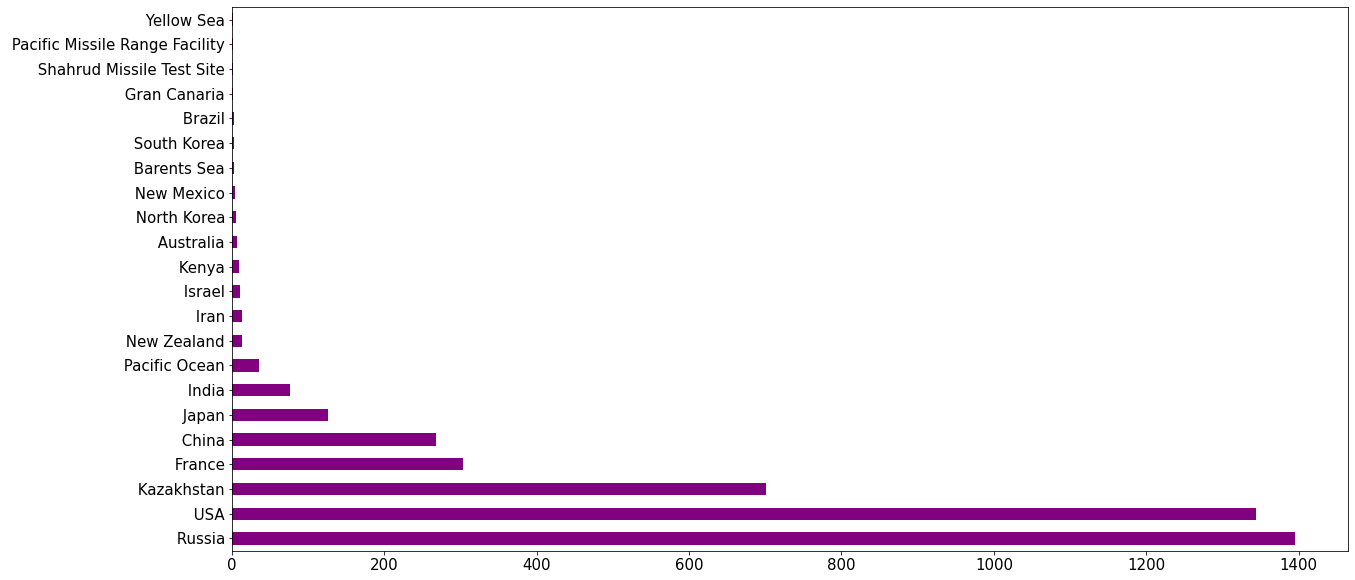

In [23]:
#Space Missions per Country
space_mission_count_per_country = df['Country'].value_counts().plot(kind = 'barh',color = 'purple',figsize = (20,10),fontsize = 15)

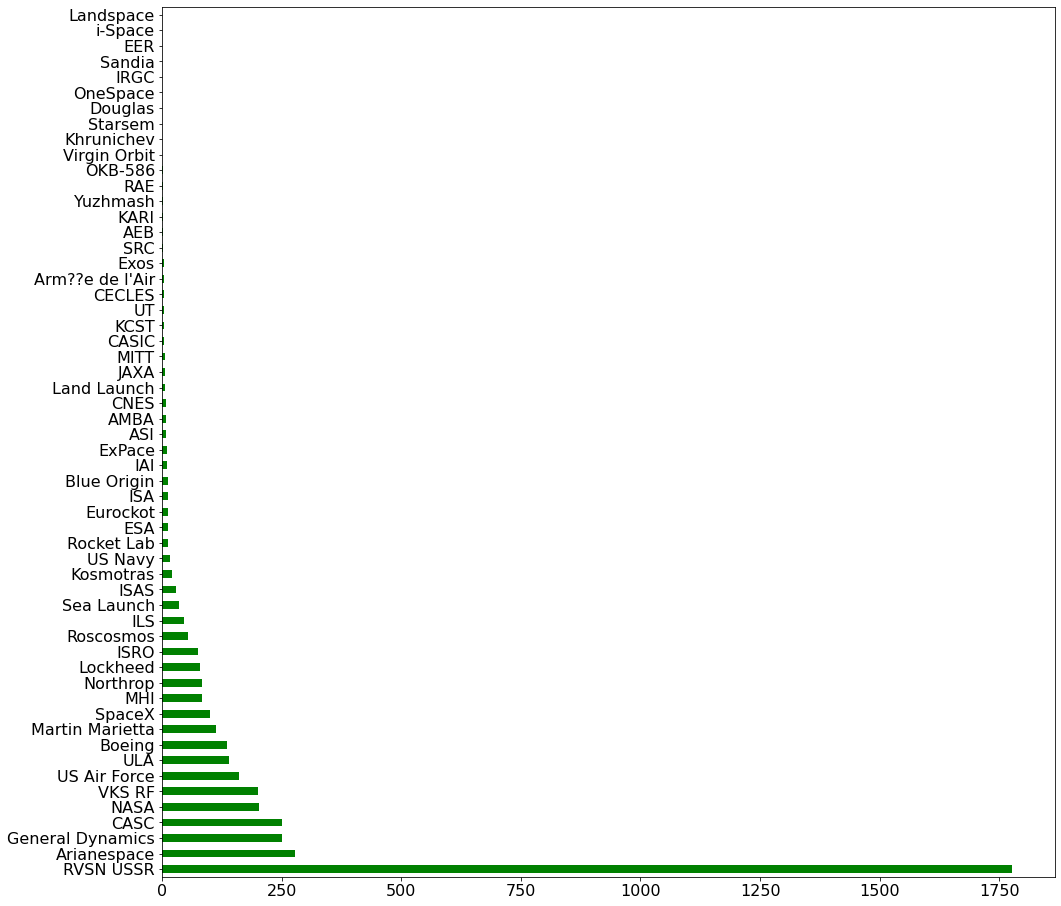

In [24]:
#Space Missions Per Company
df['Company Name'].value_counts().plot.barh(color = 'green',figsize = (16,16),fontsize = 16)

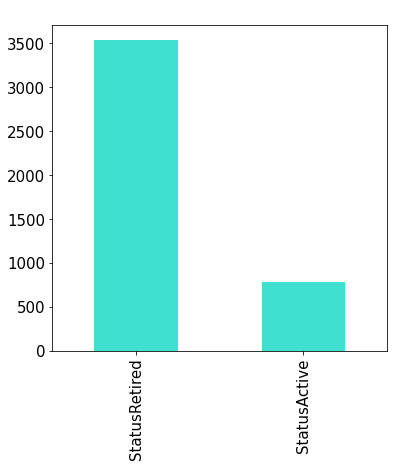

In [93]:
#Rocket Status
plt.title('Rocket Status',color = 'white',fontsize = 15)
df['Status Rocket'].value_counts().plot(kind = 'bar',color = 'turquoise',figsize = (6,6),fontsize = 15)


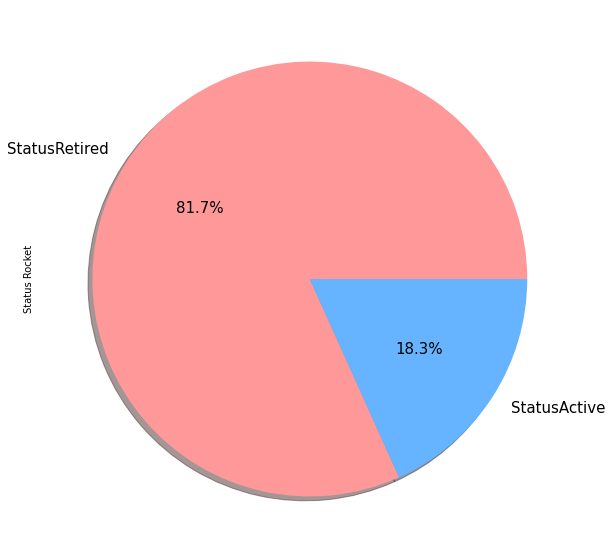

In [83]:
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
df['Status Rocket'].value_counts().plot(kind = 'pie',figsize = (10,10),fontsize = 15,autopct = '%0.1f%%',shadow = True,colors = colors)

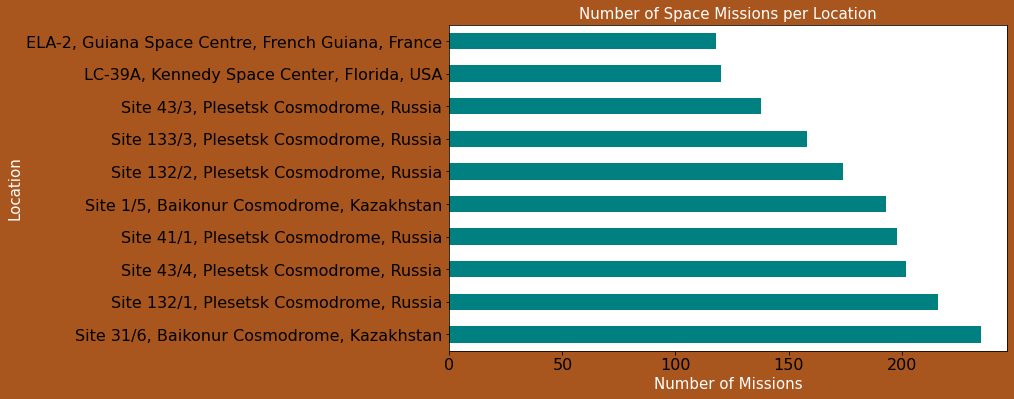

In [91]:
#Number of Space Mission | Location
fig = plt.figure()
df['Location'].value_counts().head(10).plot(kind = 'barh',color = 'teal',figsize = (10,6),fontsize = 16)
plt.xlabel('Number of Missions',color = 'white',fontsize = 15)
plt.ylabel('Location',color = 'white',fontsize = 15)
plt.title('Number of Space Missions per Location',color = 'white',fontsize = 15)
fig.patch.set_facecolor('xkcd:sienna')

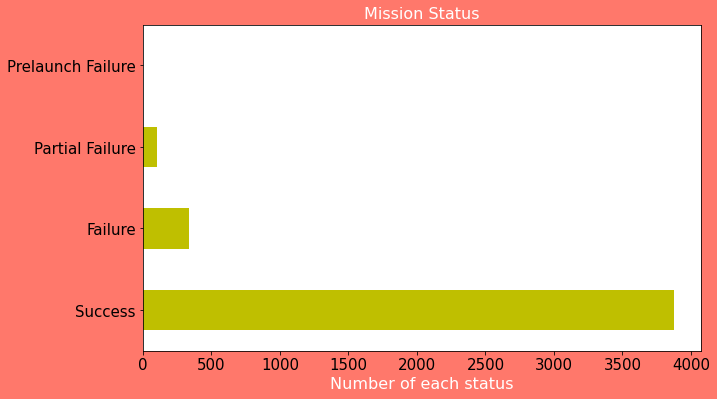

In [63]:
#Status Mission
fig = plt.figure()
df['Status Mission'].value_counts().plot(kind = 'barh',figsize = (10,6),fontsize = 15,color = 'y' )
plt.title('Mission Status',color = 'white',fontsize = 16)
plt.xlabel('Number of each status',color = 'white',fontsize = 16 )
fig.set_facecolor('xkcd:salmon')
fig.set_facecolor((1.0, 0.47, 0.42))

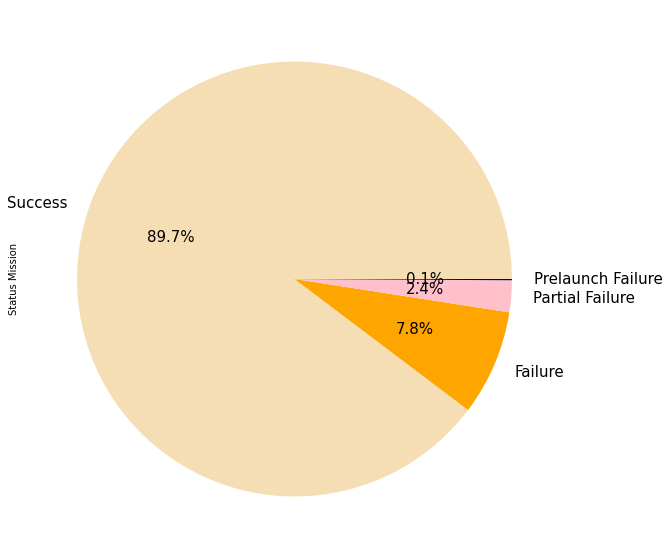

In [90]:
pie = df['Status Mission'].value_counts().plot(kind = 'pie',figsize = (10,10),autopct='%0.1f%%',fontsize = 15,colors =['wheat','orange','pink','navy'])
